In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("dat.csv")
df = df.drop(['employees_created'], axis=1)
df = df.drop(['employee_id'], axis=1)
df["age"] = df["age"].fillna(df["age"].mean())
from sklearn.preprocessing import LabelEncoder
df_a = df.copy()

# Create a label encoder object
le = LabelEncoder()
le_count = 0

le.fit(df_a['influx_route_big'])
# Transform both training and testing data
df_a['influx_route_big'] = le.transform(df_a['influx_route_big'])
df_b = pd.get_dummies(df_a['influx_route_big'], drop_first = True)

# one-hot encoding of categorical variables
df_b.columns = ['influx_0','influx_1','influx_2','influx_3','influx_4','influx_5','influx_6','influx_7']
df = pd.concat([df, df_b], axis=1)

df = df.drop(['influx_route_big'], axis=1)
pd.set_option('display.max_columns', 100)
df.head()

,age,gender,entry_date_diffs,interview_date_diffs,open_count,mail_click,owned_visit,advertisement,career_change_desired_date_1,career_change_desired_date_2,career_change_desired_date_3,career_change_desired_date_4,now_status_1,now_status_2,now_status_3,now_status_4,now_status_5,contact_result_1,contact_result_2,contact_result_4,contact_result_5,objective_variable,influx_0,influx_1,influx_2,influx_3,influx_4,influx_5,influx_6,influx_7
0,26.0,0,5,5,5,11,15,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
1,25.0,1,8,8,2,2,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,24.0,1,3,3,2,0,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,25.0,1,3,3,4,7,56,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,26.0,1,4,4,3,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [2]:
df_train = df.copy()

#変数を配列へ変換
from sklearn.cross_validation import train_test_split

X = df_train.drop("objective_variable" , axis=1).values
y = df_train["objective_variable"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

C:\Users\ryosuke.nishioka\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
import lightgbm as lgb

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

#"""LightGBM を使った二値分類のサンプルコード"""
   # データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # LightGBM のハイパーパラメータ
lgbm_params = {
        # 二値分類問題
    'objective': 'binary',
        # AUC の最大化を目指す
    'metric': 'auc',
}

    # 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

    # テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

[1]	valid_0's auc: 0.709184
[2]	valid_0's auc: 0.724576
[3]	valid_0's auc: 0.72845
[4]	valid_0's auc: 0.730958
[5]	valid_0's auc: 0.731547
[6]	valid_0's auc: 0.732702
[7]	valid_0's auc: 0.734043
[8]	valid_0's auc: 0.734338
[9]	valid_0's auc: 0.735672
[10]	valid_0's auc: 0.736466
[11]	valid_0's auc: 0.737847
[12]	valid_0's auc: 0.738974
[13]	valid_0's auc: 0.740148
[14]	valid_0's auc: 0.740645
[15]	valid_0's auc: 0.741913
[16]	valid_0's auc: 0.742543
[17]	valid_0's auc: 0.744076
[18]	valid_0's auc: 0.744562
[19]	valid_0's auc: 0.744913
[20]	valid_0's auc: 0.745967
[21]	valid_0's auc: 0.746431
[22]	valid_0's auc: 0.747251
[23]	valid_0's auc: 0.748108
[24]	valid_0's auc: 0.748537
[25]	valid_0's auc: 0.748569
[26]	valid_0's auc: 0.748691
[27]	valid_0's auc: 0.748623
[28]	valid_0's auc: 0.7481
[29]	valid_0's auc: 0.74837
[30]	valid_0's auc: 0.74807
[31]	valid_0's auc: 0.748106
[32]	valid_0's auc: 0.748059
[33]	valid_0's auc: 0.747786
[34]	valid_0's auc: 0.747871
[35]	valid_0's auc: 0.747737

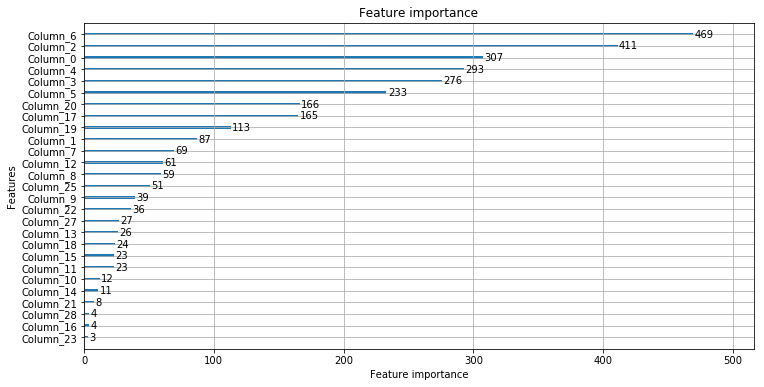

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

# 特徴量の重要度をプロットする
lgb.plot_importance(model, figsize=(12, 6))
plt.show()

In [10]:
df.head()

,age,gender,entry_date_diffs,interview_date_diffs,open_count,mail_click,owned_visit,advertisement,career_change_desired_date_1,career_change_desired_date_2,career_change_desired_date_3,career_change_desired_date_4,now_status_1,now_status_2,now_status_3,now_status_4,now_status_5,contact_result_1,contact_result_2,contact_result_4,contact_result_5,objective_variable,influx_0,influx_1,influx_2,influx_3,influx_4,influx_5,influx_6,influx_7
0,26.0,0,5,5,5,11,15,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
1,25.0,1,8,8,2,2,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,24.0,1,3,3,2,0,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,25.0,1,3,3,4,7,56,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,26.0,1,4,4,3,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [29]:
# scikit-learn インターフェース
# https://blog.amedama.jp/entry/2018/05/01/081842 これのコピペ

import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

model = lgb.LGBMRegressor()
bst = model.fit(X_train, y_train)

In [30]:
y_pred = model.predict(X_test)

# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.7451210310904508


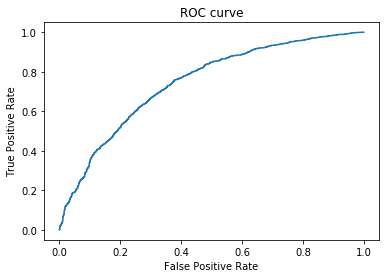

0.7451


In [31]:
%matplotlib inline
from sklearn import metrics as mtr
from matplotlib import pyplot as plt

#prob = model.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = mtr.roc_curve(y_test, prob,pos_label =1)

plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print( '%.4f' %auc)

In [32]:
# 3.まとめ（精度計算）

class_predict = model.predict(X_test)
#print('テストデータに対する roc-auc： %.4f' %mtr.roc_auc_score(y_test, prob))
#print('テストデータに対する log-loss： %.4f' %mtr.log_loss(y_test, prob))

In [43]:
predict = model.func(X_test)

AttributeError: 'LGBMRegressor' object has no attribute 'func'

In [33]:
print('テストデータに対する正解率： %.4f' %mtr.accuracy_score(y_test,class_predict))

ValueError: Can't handle mix of binary and continuous

In [26]:
df_test = pd.DataFrame(y_pred)

In [34]:
df_test.shape

(3644, 1)

In [44]:
from sklearn.model_selection import GridSearchCV

# Set params
# Scores ~0.784 (without tuning and early stopping)
params = {'boosting_type': 'gbdt',
          'max_depth' : 20,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

# Create parameters to search
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

# Create classifier to use. Note that parameters have to be input manually
# not as a dict!
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# To view the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)
# Run the grid
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_bin=512, max_depth=20, min_child_samples=5,
        min_child_weight=1, min_split_gain=0.5, n_estimators=100, n_jobs=3,
        num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1, silent=True,
        subsample=1, subsample_for_bin=200, subsample_freq=1),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'learning_rate': [0.005], 'n_estimators': [40], 'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'random_state': [501], 'colsample_bytree': [0.65, 0.66], 'subsample': [0.7, 0.75], 'reg_alpha': [1, 1.2], 'reg_lambda': [1, 1.2, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
# 参考文献：https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

In [45]:
# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.005, 'n_estimators': 40, 'num_leaves': 6, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.7}
0.6098823529411764
Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': 20, 'objective': 'binary', 'nthread': 3, 'num_leaves': 6, 'learning_rate': 0.005, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.65, 'reg_alpha': 1, 'reg_lambda': 1, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}


In [46]:
y_pred = grid.predict(X_test)

C:\Users\ryosuke.nishioka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5


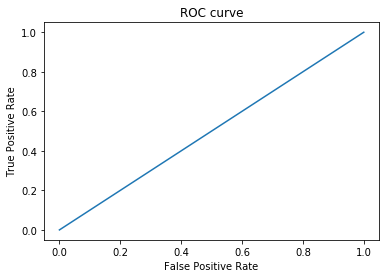

0.5000


In [47]:
# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

#prob = model.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = mtr.roc_curve(y_test, prob,pos_label =1)

plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print( '%.4f' %auc)

In [48]:
# テストデータを予測する
y_pred = grid.predict(X_test)

# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.5


C:\Users\ryosuke.nishioka\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
